In [1]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

# sums up cell areas or given runoff volume along the flow directions
from landlab.components import FlowAccumulator
# fills depressions along the flow path
from landlab.components import DepressionFinderAndRouter
# reports drainage area or flow volume of a grid
from landlab.components.flow_accum import find_drainage_area_and_discharge

In [2]:
(mg_m14_20220309_lidar,z_m14_20220309_lidar) = read_esri_ascii("m14/wsyr2/m14_20220309_lidar.asc", \
    name='topographic__elevation')

(mg_m14_20220309_sfm,z_m14_20220309_sfm) = read_esri_ascii("m14/wsyr2/m14_20220309_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220316_sfm,z_m14_20220316_sfm) = read_esri_ascii("m14/wsyr2/m14_20220316_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220324_sfm,z_m14_20220324_sfm) = read_esri_ascii("m14/wsyr2/m14_20220324_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220411_sfm,z_m14_20220411_sfm) = read_esri_ascii("m14/wsyr2/m14_20220411_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220428_sfm,z_m14_20220428_sfm) = read_esri_ascii("m14/wsyr2/m14_20220428_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220601_sfm,z_m14_20220601_sfm) = read_esri_ascii("m14/wsyr2/m14_20220601_sfm.asc", \
    name='topographic__elevation')

In [3]:
fa_m14_20220309_lidar = FlowAccumulator(mg_m14_20220309_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220309_sfm = FlowAccumulator(mg_m14_20220309_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220316_sfm = FlowAccumulator(mg_m14_20220316_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220324_sfm = FlowAccumulator(mg_m14_20220324_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220411_sfm = FlowAccumulator(mg_m14_20220411_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220428_sfm = FlowAccumulator(mg_m14_20220428_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220601_sfm = FlowAccumulator(mg_m14_20220601_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

In [4]:
(da_m14_20220309_lidar, discharge_m14_20220309_lidar) = fa_m14_20220309_lidar.accumulate_flow()
(da_m14_20220309_sfm, discharge_m14_20220309_sfm) = fa_m14_20220309_sfm.accumulate_flow()
(da_m14_20220316_sfm, discharge_m14_20220316_sfm) = fa_m14_20220316_sfm.accumulate_flow()
(da_m14_20220324_sfm, discharge_m14_20220324_sfm) = fa_m14_20220324_sfm.accumulate_flow()
(da_m14_20220411_sfm, discharge_m14_20220411_sfm) = fa_m14_20220411_sfm.accumulate_flow()
(da_m14_20220428_sfm, discharge_m14_20220428_sfm) = fa_m14_20220428_sfm.accumulate_flow()
(da_m14_20220601_sfm, discharge_m14_20220601_sfm) = fa_m14_20220601_sfm.accumulate_flow()

In [5]:
mg_m14_20220309_lidar.set_nodata_nodes_to_closed(z_m14_20220309_lidar, -9999)
mg_m14_20220309_sfm.set_nodata_nodes_to_closed(z_m14_20220309_sfm, -9999)
mg_m14_20220316_sfm.set_nodata_nodes_to_closed(z_m14_20220316_sfm, -9999)
mg_m14_20220324_sfm.set_nodata_nodes_to_closed(z_m14_20220324_sfm, -9999)
mg_m14_20220411_sfm.set_nodata_nodes_to_closed(z_m14_20220411_sfm, -9999)
mg_m14_20220428_sfm.set_nodata_nodes_to_closed(z_m14_20220428_sfm, -9999)
mg_m14_20220601_sfm.set_nodata_nodes_to_closed(z_m14_20220601_sfm, -9999)

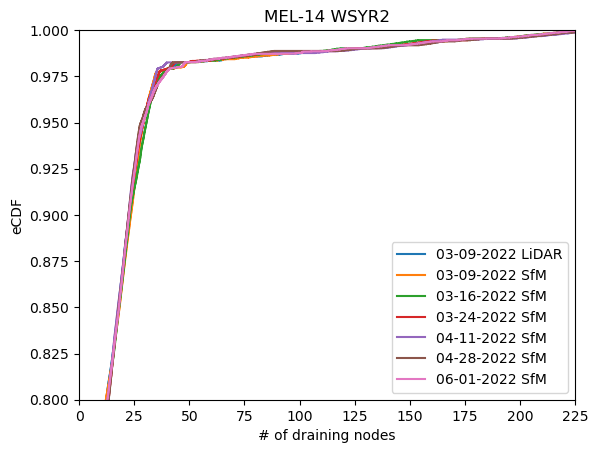

In [6]:
from scipy import stats
res0 = stats.ecdf(da_m14_20220309_lidar)
res1 = stats.ecdf(da_m14_20220309_sfm)
res2 = stats.ecdf(da_m14_20220316_sfm)
res3 = stats.ecdf(da_m14_20220324_sfm)
res4 = stats.ecdf(da_m14_20220411_sfm)
res5 = stats.ecdf(da_m14_20220428_sfm)
res6 = stats.ecdf(da_m14_20220601_sfm)
ax = plt.subplot()
res0.cdf.plot(ax, label='03-09-2022 LiDAR')
res1.cdf.plot(ax, label='03-09-2022 SfM')
res2.cdf.plot(ax, label='03-16-2022 SfM')
res3.cdf.plot(ax, label='03-24-2022 SfM')
res4.cdf.plot(ax, label='04-11-2022 SfM')
res5.cdf.plot(ax, label='04-28-2022 SfM')
res6.cdf.plot(ax, label='06-01-2022 SfM')

ax.legend(loc='lower right')
ax.set_title('MEL-14 WSYR2')
ax.set_xlabel('# of draining nodes')
ax.set_ylabel('eCDF')
ax.set_xlim(0,225)
ax.set_ylim(0.8,1)

plt.show();

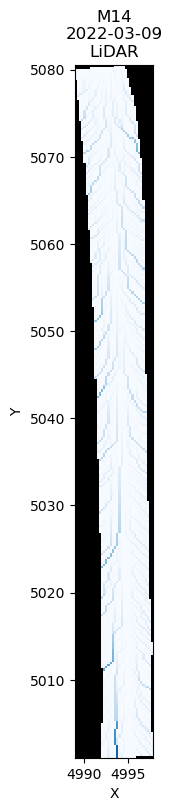

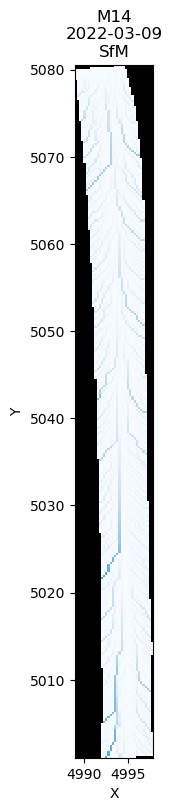

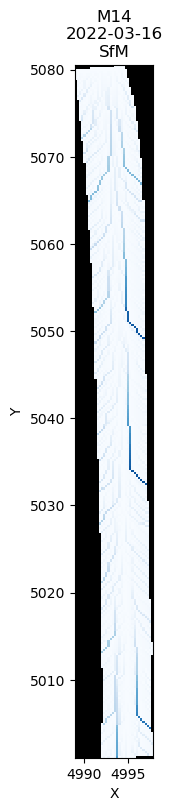

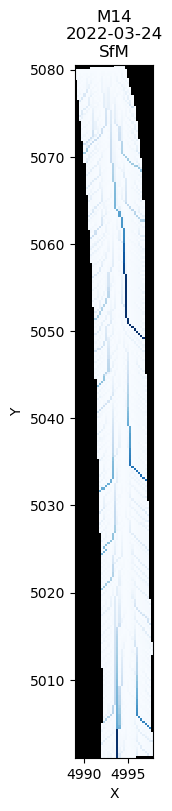

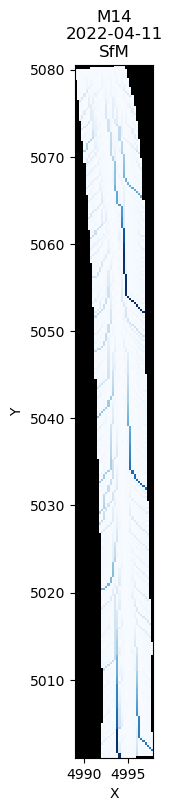

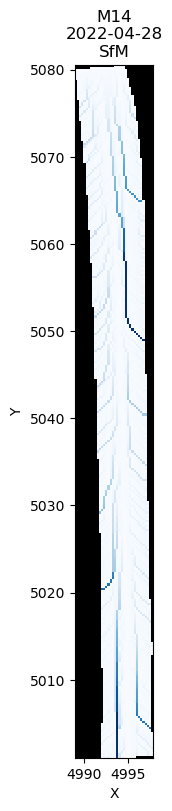

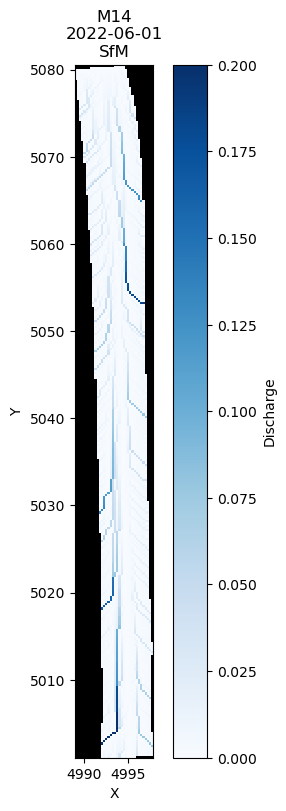

In [8]:
plt.figure(figsize=(5,9))
imshow_grid(mg_m14_20220309_lidar,'surface_water__discharge', plot_name = 'M14\n2022-03-09\nLiDAR', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

plt.figure(figsize=(5,9))
imshow_grid(mg_m14_20220309_sfm,'surface_water__discharge', plot_name = 'M14\n2022-03-09\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

plt.figure(figsize=(5,9))
imshow_grid(mg_m14_20220316_sfm,'surface_water__discharge', plot_name = 'M14\n2022-03-16\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

plt.figure(figsize=(5,9))
imshow_grid(mg_m14_20220324_sfm,'surface_water__discharge', plot_name = 'M14\n2022-03-24\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

plt.figure(figsize=(5,9))
imshow_grid(mg_m14_20220411_sfm,'surface_water__discharge', plot_name = 'M14\n2022-04-11\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

plt.figure(figsize=(5,9))
imshow_grid(mg_m14_20220428_sfm,'surface_water__discharge', plot_name = 'M14\n2022-04-28\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

plt.figure(figsize=(5,9))
imshow_grid(mg_m14_20220601_sfm,'surface_water__discharge', plot_name = 'M14\n2022-06-01\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, colorbar_label='Discharge')
plt.show();